# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padrozinação de Gráficos, Visualizações e códigos;

- _Clean COde_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__ ou em __grupos com até 4 pessoas__, caos façam em grupos enviar a relação de alunos do grupo para o professor;

- Data de Divulgação do Projeto: 29/11/2021;

- Monitoria do Projeto 1: 10/12/2021;

- Data de Entrega: 17/12/2021;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- Para quem realizar __individualmente__: NúmeroDaTurma_Projeto1_NomeDoALuno.ipynb;

- Para quem realizar em __grupos__: NúmeroDaTurma_Projeto1_GrupoX.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma, número do grupo e o nome do aluno ou alunos dentro do Notebook também.

# Preparação dos Dados e Verificação de Consistência

In [1]:
# Importando todas as bibliotecas necessárias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report

from lightgbm import LGBMClassifier

from mlxtend.plotting import plot_confusion_matrix

import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
# Criando um dataframe para ler o arquivo .csv
df_covid = pd.read_csv('COVID.csv')

print(df_covid.shape)

df_covid.head()

(499692, 20)


,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [3]:
# Renomeando a primeira coluna para "id"
df_covid.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df_covid.head()

,id,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [4]:
# Pegando o nome das colunas para reordená-las de modo a deixar o target (covid_res) na última coluna
df_covid.columns

Index(['id', 'sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [5]:
# DF com o target na última coluna
df_covid = df_covid[['id', 'sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'covid_res']]
df_covid.head()

,id,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,1


In [6]:
# Setando "id" como index, já que os dados dessa feature são iguais ao index.
df_covid.set_index('id', inplace=True)
df_covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res
id,,,,,,,,,,,,,,,,,,,
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,1
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,1


In [7]:
# Verificando as informações gerais do DF
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

#### Percebe-se que há dados faltantes na maioria das features. Portanto, vamos analisar cada uma delas para decidir o que fazer (remover as features, preencher os dados faltantes com a moda/média/mediana etc.)

In [8]:
# Verificando dados duplicados
df_covid[df_covid.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425264 entries, 22 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  425264 non-null  int64  
 1   patient_type         425264 non-null  int64  
 2   intubed              66715 non-null   float64
 3   pneumonia            425264 non-null  float64
 4   age                  425264 non-null  int64  
 5   pregnancy            210368 non-null  float64
 6   diabetes             424946 non-null  float64
 7   copd                 424959 non-null  float64
 8   asthma               424959 non-null  float64
 9   inmsupr              424955 non-null  float64
 10  hypertension         424955 non-null  float64
 11  other_disease        424920 non-null  float64
 12  cardiovascular       424959 non-null  float64
 13  obesity              424954 non-null  float64
 14  renal_chronic        424958 non-null  float64
 15  tobacco         

#### Nota-se que há muitos dados duplicados (ao setar o "id" como index).   
#### Não iremos remover esses dados duplicados logo de início para analisar melhor os value_counts() de cada feature, comparando o DF original com o DF sem dados duplicados.

In [9]:
# Criando outro DF sem dados duplicados
df_covid_no_dupl = df_covid.drop_duplicates().copy()
df_covid_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74428 entries, 0 to 499688
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  74428 non-null  int64  
 1   patient_type         74428 non-null  int64  
 2   intubed              40709 non-null  float64
 3   pneumonia            74417 non-null  float64
 4   age                  74428 non-null  int64  
 5   pregnancy            34890 non-null  float64
 6   diabetes             73105 non-null  float64
 7   copd                 73287 non-null  float64
 8   asthma               73291 non-null  float64
 9   inmsupr              73075 non-null  float64
 10  hypertension         73248 non-null  float64
 11  other_disease        72579 non-null  float64
 12  cardiovascular       73224 non-null  float64
 13  obesity              73268 non-null  float64
 14  renal_chronic        73258 non-null  float64
 15  tobacco              73158 non-null

In [10]:
# Verificando a porcentagem de valores do target (DF original)
df_covid['covid_res'].value_counts(normalize=True)*100

0    55.841398
1    44.158602
Name: covid_res, dtype: float64

In [11]:
# Verificando a porcentagem de valores do target (DF sem dados duplicados)
df_covid_no_dupl['covid_res'].value_counts(normalize=True)*100

1    50.951255
0    49.048745
Name: covid_res, dtype: float64

In [12]:
# Criando um DF para visualizar a porcentagem de dados não nulos em cada feature (DF original)
dict_non_null = {}
for feature in df_covid:
    dict_non_null[feature] = ((df_covid[feature].count())/(len(df_covid))*100)
df_non_null = pd.DataFrame(dict_non_null.items())
df_non_null.columns = ['features', 'non_null_percent']
df_non_null

,features,non_null_percent
0,sex,100.000000
1,patient_type,100.000000
2,intubed,21.498043
3,pneumonia,99.997799
4,age,100.000000
5,pregnancy,49.081834
6,diabetes,99.671598
7,copd,99.710622
8,asthma,99.711422
9,inmsupr,99.667395


In [13]:
# Criando um DF para visualizar a porcentagem de dados não nulos em cada feature (DF sem dados duplicados)
dict_non_null_no_dupl = {}
for feature in df_covid:
    dict_non_null_no_dupl[feature] = ((df_covid_no_dupl[feature].count())/(len(df_covid_no_dupl))*100)
df_non_null_no_dupl = pd.DataFrame(dict_non_null_no_dupl.items())
df_non_null_no_dupl.columns = ['features', 'non_null_no_dupl_percent']
df_non_null_no_dupl

,features,non_null_no_dupl_percent
0,sex,100.000000
1,patient_type,100.000000
2,intubed,54.695813
3,pneumonia,99.985221
4,age,100.000000
5,pregnancy,46.877519
6,diabetes,98.222443
7,copd,98.466975
8,asthma,98.472349
9,inmsupr,98.182136


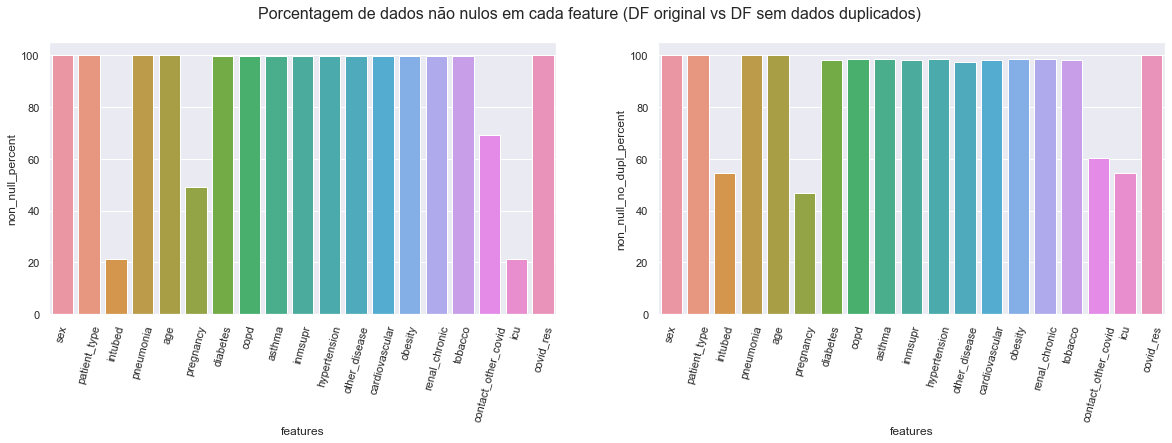

In [14]:
# Comparando a porcentagem de dados não nulos em cada feature (DF original vs DF sem dados duplicados)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

fig.suptitle('Porcentagem de dados não nulos em cada feature (DF original vs DF sem dados duplicados)', fontsize=16)

sns.barplot(data=df_non_null, x='features', y='non_null_percent', ax=ax1);
plt.setp(ax1.get_xticklabels(), rotation=75);

sns.barplot(data=df_non_null_no_dupl, x='features', y='non_null_no_dupl_percent', ax=ax2);
plt.setp(ax2.get_xticklabels(), rotation=75);

In [15]:
# Verificando algumas medidas de dispersão (média, desvio padrão, mínimo, máximo, quartis) -> DF original
df_covid.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,covid_res
count,499692.000000,499692.000000,107424.000000,499681.000000,499692.000000,245258.000000,498051.000000,498246.000000,498250.000000,498030.000000,498203.000000,497499.000000,498183.000000,498222.000000,498216.000000,498113.000000,346017.000000,107423.000000,499692.000000
mean,0.493492,0.784775,0.084739,0.157533,42.545942,0.014736,0.125186,0.016610,0.032542,0.016206,0.163267,0.030939,0.022921,0.164443,0.020110,0.086235,0.569238,0.083865,0.441586
std,0.499958,0.410978,0.278494,0.364302,16.640391,0.120492,0.330930,0.127806,0.177434,0.126267,0.369609,0.173152,0.149653,0.370677,0.140376,0.280712,0.495184,0.277186,0.496577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Porcentagem dos valores de cada feature (DF original)
df_vc_total = pd.DataFrame()
for feature in df_covid:
    df_vc = (df_covid[feature].value_counts(normalize=True)*100).to_frame().stack().reset_index()
    df_vc.columns = ['values', 'features', 'percent']
    df_vc_total = df_vc_total.append(df_vc)
df_vc_total.set_index('features', inplace=True)
df_vc_total

# sex: 0 = Homem / 1 = Mulher
# patient_type: 0 = internado / 1 = dispensado

,values,percent
features,,
sex,0.0,50.650801
sex,1.0,49.349199
patient_type,1.0,78.477542
patient_type,0.0,21.522458
intubed,0.0,91.526102
...,...,...
contact_other_covid,0.0,43.076207
icu,0.0,91.613528
icu,1.0,8.386472


In [17]:
# Removendo "age" para plotar o gráfico apenas com os valores binários (DF original)
df_vc_ageless = df_vc_total.drop('age').copy()
df_vc_ageless

,values,percent
features,,
sex,0.0,50.650801
sex,1.0,49.349199
patient_type,1.0,78.477542
patient_type,0.0,21.522458
intubed,0.0,91.526102
intubed,1.0,8.473898
pneumonia,0.0,84.246749
pneumonia,1.0,15.753251
pregnancy,0.0,98.526450


In [18]:
# Porcentagem dos valores de cada feature (DF sem dados duplicados)
df_vc_total_no_dupl = pd.DataFrame()
for feature in df_covid_no_dupl:
    df_vc_no_dupl = (df_covid_no_dupl[feature].value_counts(normalize=True)*100).to_frame().stack().reset_index()
    df_vc_no_dupl.columns = ['values', 'features', 'percent']
    df_vc_total_no_dupl = df_vc_total_no_dupl.append(df_vc_no_dupl)
df_vc_total_no_dupl.set_index('features', inplace=True)
df_vc_total_no_dupl

# sex: 0 = Homem / 1 = Mulher
# patient_type: 0 = internado / 1 = dispensado

,values,percent
features,,
sex,0.0,52.094642
sex,1.0,47.905358
patient_type,0.0,54.858387
patient_type,1.0,45.141613
intubed,0.0,84.322877
...,...,...
contact_other_covid,1.0,42.320141
icu,0.0,84.005601
icu,1.0,15.994399


In [19]:
# Removendo "age" para plotar o gráfico apenas com os valores binários (DF sem dados duplicados)
df_vc_no_dupl_ageless = df_vc_total_no_dupl.drop('age').copy()
df_vc_no_dupl_ageless

,values,percent
features,,
sex,0.0,52.094642
sex,1.0,47.905358
patient_type,0.0,54.858387
patient_type,1.0,45.141613
intubed,0.0,84.322877
intubed,1.0,15.677123
pneumonia,0.0,58.211161
pneumonia,1.0,41.788839
pregnancy,0.0,96.546288


In [20]:
# Fusão dos DFs (Original vs Sem duplicados) com o percentual dos valores binários de cada feature
# Ordenando pelas maiores diferenças
df_merge_vc = pd.merge(df_vc_ageless, df_vc_no_dupl_ageless, on=['features', 'values'])
df_merge_vc.columns = ['values', 'percent_original', 'percent_no_duplic']
df_merge_vc['difference'] = (df_merge_vc['percent_original'] - df_merge_vc['percent_no_duplic']).abs()
df_merge_vc.sort_values(by='difference', ascending=False, inplace=True)
df_merge_vc

,values,percent_original,percent_no_duplic,difference
features,,,,
patient_type,1.0,78.477542,45.141613,33.335929
patient_type,0.0,21.522458,54.858387,33.335929
hypertension,0.0,83.673322,57.597477,26.075845
hypertension,1.0,16.326678,42.402523,26.075845
pneumonia,0.0,84.246749,58.211161,26.035588
pneumonia,1.0,15.753251,41.788839,26.035588
diabetes,1.0,12.518597,35.038643,22.520046
diabetes,0.0,87.481403,64.961357,22.520046
obesity,1.0,16.444276,32.347000,15.902724


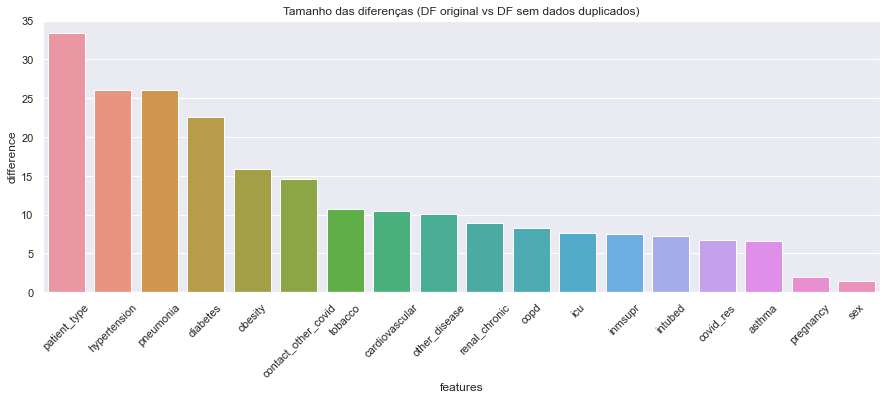

In [21]:
# Visualizando o tamanho das diferenças (DF original vs DF sem dados duplicados)
plt.figure(figsize=(15, 5));
sns.barplot(data=df_merge_vc, x=df_merge_vc.index, y='difference');
plt.xticks(rotation=45);
plt.title('Tamanho das diferenças (DF original vs DF sem dados duplicados)');

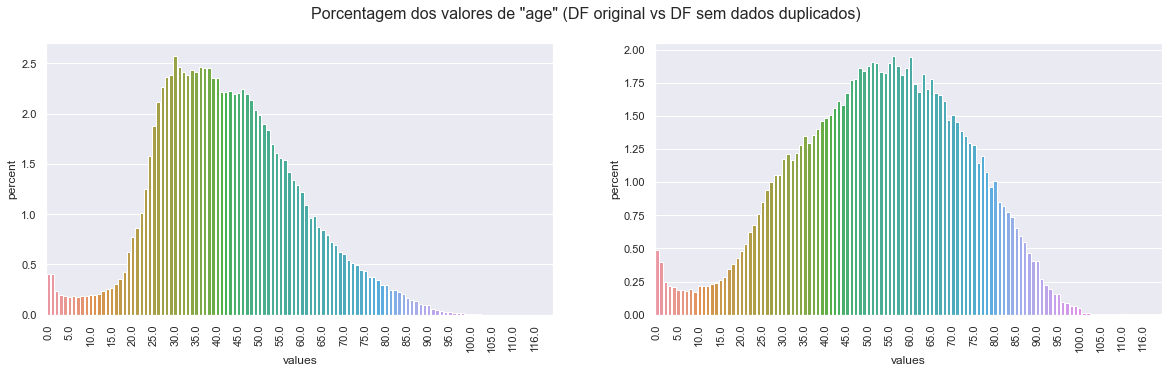

In [22]:
# Comparando a porcentagem dos valores de "age" (DF original vs DF sem dados duplicados)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

fig.suptitle('Porcentagem dos valores de "age" (DF original vs DF sem dados duplicados)', fontsize=16)

sns.barplot(data=df_vc_total.loc['age'], x=df_vc_total.loc['age']['values'], y='percent', ax=ax1);
plt.setp(ax1.get_xticklabels(), rotation=90);
ax1.xaxis.set_ticks(np.arange(0, 117, 5));

sns.barplot(data=df_vc_total_no_dupl.loc['age'], x=df_vc_total_no_dupl.loc['age']['values'], y='percent', ax=ax2);
plt.setp(ax2.get_xticklabels(), rotation=90);
ax2.xaxis.set_ticks(np.arange(0, 117, 5));

In [23]:
print('DF original')
print(f'Média das idades: {df_covid.age.mean()}')
print(f'Moda das idades: {df_covid.age.mode()}\n')

print('DF sem dados duplicados')
print(f'Média das idades: {df_covid_no_dupl.age.mean()}')
print(f'Moda das idades: {df_covid_no_dupl.age.mode()}')

DF original
Média das idades: 42.54594230045708
Moda das idades: 0    30
Name: age, dtype: int64

DF sem dados duplicados
Média das idades: 52.492543128929974
Moda das idades: 0    56
Name: age, dtype: int64


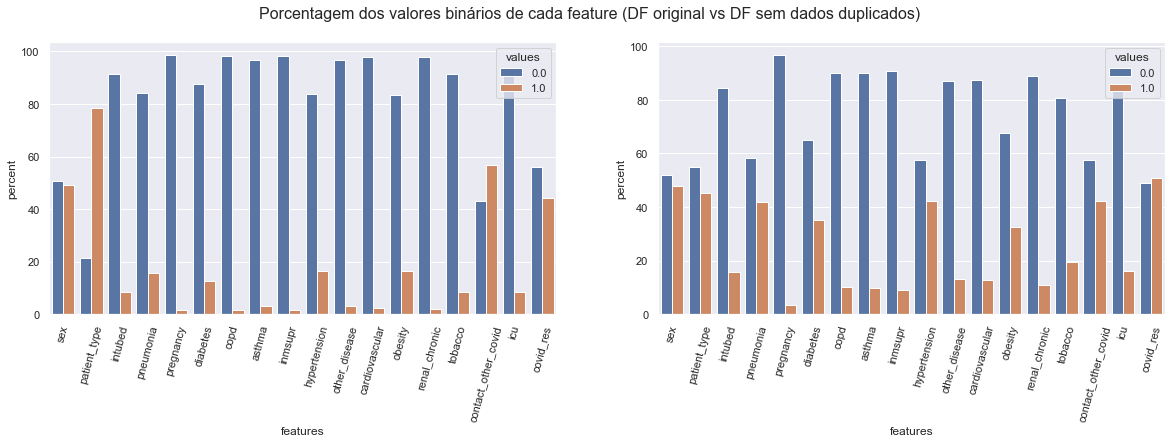

In [24]:
# Comparando a porcentagem dos valores binários de cada feature (DF original vs DF sem dados duplicados)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

fig.suptitle('Porcentagem dos valores binários de cada feature (DF original vs DF sem dados duplicados)', fontsize=16)

sns.barplot(data=df_vc_ageless, x=df_vc_ageless.index, y='percent', hue='values', ax=ax1);
plt.setp(ax1.get_xticklabels(), rotation=75);

sns.barplot(data=df_vc_no_dupl_ageless, x=df_vc_no_dupl_ageless.index, y='percent', hue='values', ax=ax2);
plt.setp(ax2.get_xticklabels(), rotation=75);

# sex: 0 = Homem / 1 = Mulher
# patient_type: 0 = internado / 1 = dispensado

#### Comparando o DF original com o DF sem dados duplicados, observa-se diferenças significativas.   
Alguns exemplos:
- com o DF original, a maioria dos pacientes foi dispensada (78,5%);
- com o DF sem dados duplicados, a maioria foi internada (54,9%);
- com o DF original, 15,7% tiveram pneumonia;
- com o DF sem dados duplicados, 41,8% tiveram pneumonia.

#### Em muitos casos, os dados duplicados costumam ser removidos. No entanto, neste caso, não poderíamos, pois o fato de termos muitos dados duplicados significa apenas que temos muitas pessoas com as mesmas características. Portanto, a partir de agora, vamos trabalhar somente com o DF original.

#### Agora, vamos tratar os dados faltantes (remover feature(s) ou preencher com média/moda/mediana etc.)

In [25]:
# Verificando novamente a porcentagem de dados não nulos em cada feature
df_non_null

,features,non_null_percent
0,sex,100.000000
1,patient_type,100.000000
2,intubed,21.498043
3,pneumonia,99.997799
4,age,100.000000
5,pregnancy,49.081834
6,diabetes,99.671598
7,copd,99.710622
8,asthma,99.711422
9,inmsupr,99.667395


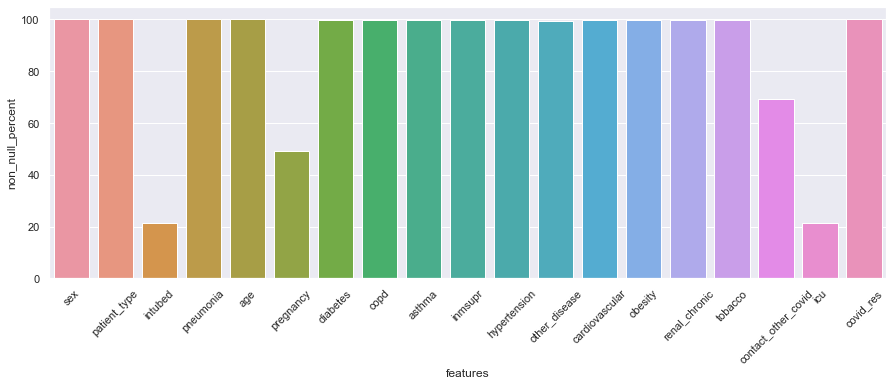

In [26]:
# Visualizando novamente a porcentagem de dados não nulos em cada feature
plt.figure(figsize=(15,5));

fig.suptitle('Porcentagem de dados não nulos em cada feature', fontsize=16)

sns.barplot(data=df_non_null, x='features', y='non_null_percent');
plt.xticks(rotation=45);

#### Começando pelas features que possuem poucos dados válidos: "intubed" e "icu".      
#### Como só temos 21,5% de dados válidos tanto em "intubed" quanto em "icu", vamos remover essas features.

In [27]:
# Criando um DF sem as features "intubed" e "icu"
df_covid_no_intub_icu = df_covid.drop(['intubed', 'icu'], axis=1).copy()
df_covid_no_intub_icu.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
id,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
2,1,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1
3,0,0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
4,1,0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1


### Tratando a feature "pregnancy"

In [28]:
# Verificando os dados faltantes em "pregnancy", de acordo com o sexo
df_covid_no_intub_icu[df_covid_no_intub_icu['pregnancy'].isna()]['sex'].value_counts()

0    253098
1      1336
Name: sex, dtype: int64

#### Percebe-se que a grande maioria dos dados faltantes em "pregnancy" está relacionada ao sexo masculino. Portanto, vamos preencher esses dados com "0" para os homens, já que eles não ficam grávidos.  

In [29]:
# Verificando a quantidade total de mulheres
df_covid_no_intub_icu['sex'].value_counts()

0    253098
1    246594
Name: sex, dtype: int64

In [30]:
# Verificando a porcentagem de grávidas (que só faz sentido para o sexo feminino)
df_covid_no_intub_icu[df_covid_no_intub_icu['sex'] == 1]['pregnancy'].value_counts(normalize=True)

0.0    0.985264
1.0    0.014736
Name: pregnancy, dtype: float64

#### A porcentagem de grávidas é muito pequena.

#### Observa-se que a quantidade de dados faltantes em "pregnancy" para o sexo feminino é relativamente pequena, se compararmos com a quantidade total de mulheres. E como apenas 0,5% delas (1336 de 246594) estão com dados faltantes em "pregnancy", podemos preencher com a moda (que seria "0").

In [31]:
# Confirmando a moda em "pregnancy", que só faz sentido para o sexo feminino
df_covid_no_intub_icu[df_covid_no_intub_icu['sex'] == 1]['pregnancy'].mode()

0    0.0
Name: pregnancy, dtype: float64

In [32]:
# Preenchendo todos os dados faltantes em "pregnancy" com a moda (0)
df_covid_no_intub_icu['pregnancy'] = df_covid_no_intub_icu['pregnancy'].fillna(df_covid_no_intub_icu['pregnancy'].mode()[0])

In [33]:
# Verificando se todos os dados foram preenchidos
df_covid_no_intub_icu[df_covid_no_intub_icu['pregnancy'].isna()]

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
id,,,,,,,,,,,,,,,,,


### Tratando a feature "contact_other_covid"

In [34]:
# Verificando a porcentagem de dados válidos em "contact_other_covid"
(df_covid_no_intub_icu['contact_other_covid'].count())/(len(df_covid_no_intub_icu))*100

69.24605557023126

#### Como temos quase 70% de dados válidos, vamos manter a feature "contact_other_covid" e preencher os dados faltantes.

In [35]:
# Verificando a porcentagem dos valores em "contact_other_covid"
df_covid_no_intub_icu['contact_other_covid'].value_counts(normalize=True)

1.0    0.569238
0.0    0.430762
Name: contact_other_covid, dtype: float64

#### Vamos preencher os dados faltantes de acordo com as porcentagens obtidas acima:
- 56,9% dos dados faltantes vamos preencher com o valor "1";
- o restante dos dados faltantes (43,1%) vamos preencher com o valor "0".

In [36]:
# Criando uma variável para ajustar o parâmetro "limit" em "fillna" -> pegar 56,9% dos dados faltantes
fillna_1_limite = int(0.569 * len(df_covid_no_intub_icu[df_covid_no_intub_icu['contact_other_covid'].isna()]))

In [37]:
# Preenchendo 56,9% dos dados faltantes em "contact_other_covid" com o valor "1"
df_covid_no_intub_icu['contact_other_covid'] = df_covid_no_intub_icu['contact_other_covid'].fillna(1, limit=fillna_1_limite)

In [38]:
# Preenchendo o resto dos dados faltantes em "contact_other_covid" com o valor "0"
df_covid_no_intub_icu['contact_other_covid'] = df_covid_no_intub_icu['contact_other_covid'].fillna(0)

In [39]:
# Verificando se todos os dados foram preenchidos
df_covid_no_intub_icu[df_covid_no_intub_icu['contact_other_covid'].isna()]

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
id,,,,,,,,,,,,,,,,,


In [40]:
# Verificando novamente a porcentagem dos valores em "contact_other_covid" para ver se continua a mesma
df_covid_no_intub_icu['contact_other_covid'].value_counts(normalize=True)

1.0    0.569165
0.0    0.430835
Name: contact_other_covid, dtype: float64

### Tratando as demais features   
("pneumonia", "diabetes", "copd", "asthma", "inmsupr", "hypertension", "other_disease", "cardiovascular", "obesity", "renal_chronic", "tobacco")

#### Em todas essas features, há poucos dados faltantes (menos de 1%). Portanto, vamos preencher com a moda.

In [41]:
# Pegando o nome das colunas
df_covid_no_intub_icu.columns

Index(['sex', 'patient_type', 'pneumonia', 'age', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res'],
      dtype='object')

In [42]:
# Criando um DF apenas com as colunas que ainda possuem dados faltantes
df_treat_feat = df_covid_no_intub_icu.drop(['sex', 'patient_type',
       'age', 'pregnancy', 'contact_other_covid', 'covid_res'], axis=1)

df_treat_feat.head()

,pneumonia,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
id,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# Verificando a moda de todas as features que ainda possuem dados faltantes
for column in df_treat_feat:
    print(df_treat_feat[column].mode())

0    0.0
Name: pneumonia, dtype: float64
0    0.0
Name: diabetes, dtype: float64
0    0.0
Name: copd, dtype: float64
0    0.0
Name: asthma, dtype: float64
0    0.0
Name: inmsupr, dtype: float64
0    0.0
Name: hypertension, dtype: float64
0    0.0
Name: other_disease, dtype: float64
0    0.0
Name: cardiovascular, dtype: float64
0    0.0
Name: obesity, dtype: float64
0    0.0
Name: renal_chronic, dtype: float64
0    0.0
Name: tobacco, dtype: float64


In [44]:
# Preenchendo as features que ainda possuem dados faltantes com a moda (0)
df_covid_no_intub_icu = df_covid_no_intub_icu.fillna(0)

In [45]:
# Verificando se todas as features estão com os dados completos
df_covid_no_intub_icu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   pneumonia            499692 non-null  float64
 3   age                  499692 non-null  int64  
 4   pregnancy            499692 non-null  float64
 5   diabetes             499692 non-null  float64
 6   copd                 499692 non-null  float64
 7   asthma               499692 non-null  float64
 8   inmsupr              499692 non-null  float64
 9   hypertension         499692 non-null  float64
 10  other_disease        499692 non-null  float64
 11  cardiovascular       499692 non-null  float64
 12  obesity              499692 non-null  float64
 13  renal_chronic        499692 non-null  float64
 14  tobacco              499692 non-null  float64
 15  contact_other_cov

In [46]:
df_covid_no_intub_icu.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
id,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0,0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1,0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1


### Com os dados prontos, vamos separar o DF: 90% para treino e 10% para teste.

In [47]:
df_covid_train = df_covid_no_intub_icu.sample(frac = 0.9, random_state=7)

print(df_covid_train.shape)

df_covid_train.head()

(449723, 17)


,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
id,,,,,,,,,,,,,,,,,
364829,1,1,0.0,65,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
474459,1,0,1.0,39,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
154302,1,0,1.0,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
253369,0,1,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
177907,1,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [48]:
df_covid_test = df_covid_no_intub_icu.drop(df_covid_train.index)

print(df_covid_test.shape)

df_covid_test.head()

(49969, 17)


,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
id,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


# Análise Exploratória dos Dados

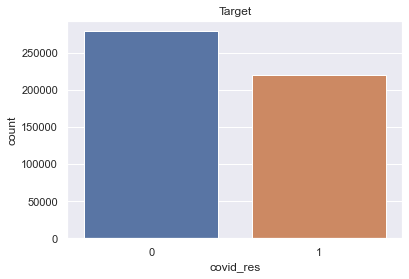

In [49]:
# Plotando os valores do target
sns.countplot(data=df_covid_no_intub_icu, x='covid_res');

# Criando um título para o gráfico
plt.title('Target');

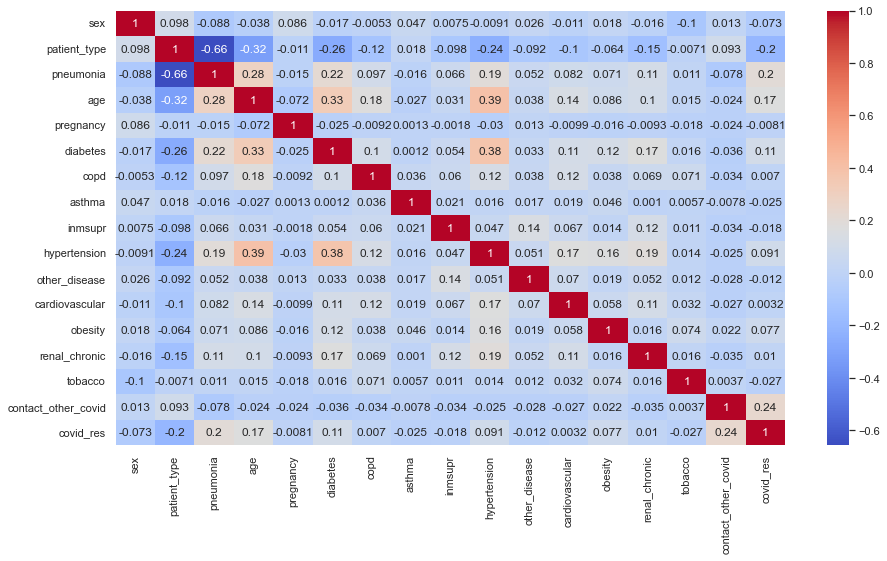

In [50]:
# Mapa de calor -> Visualizando as correlações entre as features
plt.figure(figsize=(15,8));
sns.heatmap(df_covid_no_intub_icu.corr(), annot=True, cmap='coolwarm');

#### As correlações que mais chamam a atenção são:   
    - "patient_type" e "pneumonia" (-0.66);   
    - "age" e "hypertension" (0.39);   
    - "diabetes" e "hypertension" (0.38);   
    - "age" e "diabetes" (0.33);   
    - "patient_type" e "age" (-0.32);   
    - "patient_type" e "diabetes" (-0.26);   
    - "patient_type" e "hypertension" (-0.24).

#### As correlações com o target que mais chamam a atenção são:   
    - "contact_other_covid" (0.24);   
    - "patient_type" (-0.2);   
    - "pneumonia" (0.2).

In [51]:
# Verificando algumas medidas de dispersão (média, desvio padrão, mínimo, máximo, quartis)
df_covid_no_intub_icu.describe()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
count,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000
mean,0.493492,0.784775,0.157529,42.545942,0.007232,0.124775,0.016562,0.032448,0.016152,0.162780,0.030803,0.022852,0.163959,0.020050,0.085963,0.569165,0.441586
std,0.499958,0.410978,0.364299,16.640391,0.084736,0.330464,0.127624,0.177187,0.126060,0.369165,0.172784,0.149432,0.370239,0.140173,0.280310,0.495194,0.496577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelagem dos Dados

In [52]:
X = df_covid_train.drop(['covid_res'], axis=1).copy()
y = df_covid_train['covid_res']

print(X.shape, y.shape)

(449723, 16) (449723,)


In [54]:
X_test = df_covid_test.drop(['covid_res'], axis=1).copy()
y_test = df_covid_test['covid_res']

print(X_test.shape, y_test.shape)

(49969, 16) (49969,)


In [55]:
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(449723, 16) (449723,)
(49969, 16) (49969,)


In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=7)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(314806, 16) (314806,)
(134917, 16) (134917,)


#### Como a amostragem é aleatória, esperamos a mesma distribuição:

In [57]:
y_train.value_counts(normalize=True)

0    0.557969
1    0.442031
Name: covid_res, dtype: float64

In [58]:
y_valid.value_counts(normalize=True)

0    0.559351
1    0.440649
Name: covid_res, dtype: float64

In [59]:
y_test.value_counts(normalize=True)

0    0.558686
1    0.441314
Name: covid_res, dtype: float64

## Regressão Logística
#### Verificando apenas a feature "age".

In [60]:
# Definindo uma variável explicativa (age) e o target
X_lr_age = df_covid_no_intub_icu.age.values.reshape(-1, 1)
y_lr = df_covid_no_intub_icu['covid_res']

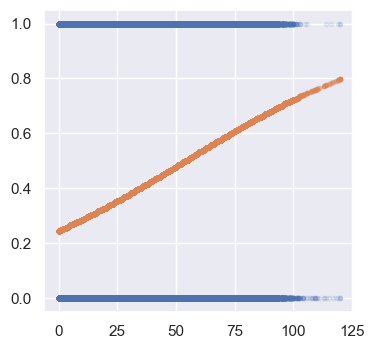

In [61]:
# Aplicando uma Regressão Logística para visualizar a relação entre a única feature não binária (age) e o target
model_lr = LogisticRegression(random_state=7)

model_lr.fit(X_lr_age, y_lr)

y_lr_pred = model_lr.predict_proba(X_lr_age)[:, 1]

plt.figure(figsize = (4, 4), dpi = 100)

plt.plot(X_lr_age, y_lr, '.', alpha = 0.1)
plt.plot(X_lr_age, y_lr_pred, '.', alpha = 0.5)
plt.show()

#### Nota-se que, quanto maior a idade, maior a chance de se obter um teste positivo para COVID.

## Regressão Logística
#### Utilizando todas as variáveis

In [62]:
model_lr_2 = LogisticRegression(random_state=7)

model_lr_2.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [63]:
y_lr_2_train_pred = model_lr_2.predict(X_train)
y_lr_2_valid_pred = model_lr_2.predict(X_valid)

print(y_lr_2_train_pred.shape, y_lr_2_valid_pred.shape)

(314806,) (134917,)


In [64]:
acc_lr_2_train = accuracy_score(y_train, y_lr_2_train_pred)
prec_lr_2_train = precision_score(y_train, y_lr_2_train_pred)
rec_lr_2_train = recall_score(y_train, y_lr_2_train_pred)

acc_lr_2_valid = accuracy_score(y_valid, y_lr_2_valid_pred)
prec_lr_2_valid = precision_score(y_valid, y_lr_2_valid_pred)
rec_lr_2_valid = recall_score(y_valid, y_lr_2_valid_pred)

print(f'Treino:\nAcc: {acc_lr_2_train:.2f}, Precision: {prec_lr_2_train:.2f}, Recall: {rec_lr_2_train:.2f}\n')
print(f'Validação:\nAcc: {acc_lr_2_valid:.2f}, Precision: {prec_lr_2_valid:.2f}, Recall: {rec_lr_2_valid:.2f}')

Treino:
Acc: 0.65, Precision: 0.63, Recall: 0.52

Validação:
Acc: 0.65, Precision: 0.63, Recall: 0.53


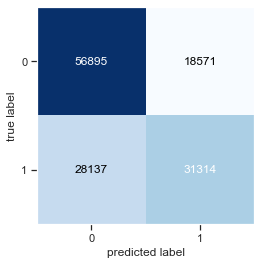

In [65]:
cm_lr_2 = confusion_matrix(y_valid, y_lr_2_valid_pred)

plot_confusion_matrix(conf_mat=cm_lr_2)
plt.show()

Lembrando:

<img src="confusion_matrix.png" width=300 align=left>

In [66]:
df_covid_test['predict_lr_2'] = model_lr_2.predict(X_test)
df_covid_test.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,predict_lr_2
id,,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


In [67]:
df_covid_test['predict_lr_2'].value_counts(normalize=True)

0    0.62827
1    0.37173
Name: predict_lr_2, dtype: float64

In [68]:
acc_lr_2_test = accuracy_score(df_covid_test['covid_res'], df_covid_test['predict_lr_2'])
prec_lr_2_test = precision_score(df_covid_test['covid_res'], df_covid_test['predict_lr_2'])
rec_lr_2_test = recall_score(df_covid_test['covid_res'], df_covid_test['predict_lr_2'])

print(f'Teste:\nAcc: {acc_lr_2_test:.2f}, Precision: {prec_lr_2_test:.2f}, Recall: {rec_lr_2_test:.2f}')

Teste:
Acc: 0.65, Precision: 0.63, Recall: 0.53


## Decision Tree
#### Pegando apenas as variáveis com as maiores correlações em relação ao target.

In [69]:
model_tree = DecisionTreeClassifier(random_state=7)

X_tree = df_covid_no_intub_icu.loc[:, ['contact_other_covid', 
                       'patient_type',  
                       'pneumonia']]
y_tree = df_covid_no_intub_icu['covid_res']

model_tree.fit(X_tree, y_tree)

DecisionTreeClassifier(random_state=7)

In [70]:
y_tree_pred = model_tree.predict(X_tree)

In [71]:
acc_tree = accuracy_score(y_tree, y_tree_pred)
prec_tree = precision_score(y_tree, y_tree_pred)
rec_tree = recall_score(y_tree, y_tree_pred)

print(f'Acc: {acc_tree:.2f}, Precision: {prec_tree:.2f}, Recall: {rec_tree:.2f}')

Acc: 0.64, Precision: 0.72, Recall: 0.31


In [72]:
y_tree_pred_proba = model_tree.predict_proba(X_tree)

print('AUC:', np.round(roc_auc_score(y_tree, y_tree_pred_proba[:, 1]), 2))
print('Gini:', np.round(2*roc_auc_score(y_tree, y_tree_pred_proba[:, 1]) - 1, 2))

AUC: 0.68
Gini: 0.37


Lembrando:

AUC é a área entre curvas 0 e 1. É uma métrica que mede o quão bem o modelo separa as classes da variável resposta baseado na sua distribuição acumulada. Valores maiores são melhores.

Gini é uma métrica que mede o quão bem o modelo separa as classes da variável resposta baseado na taxa de verdadeiros-positivos contra a taxa de falsos-positivos. Valores maiores são melhores.

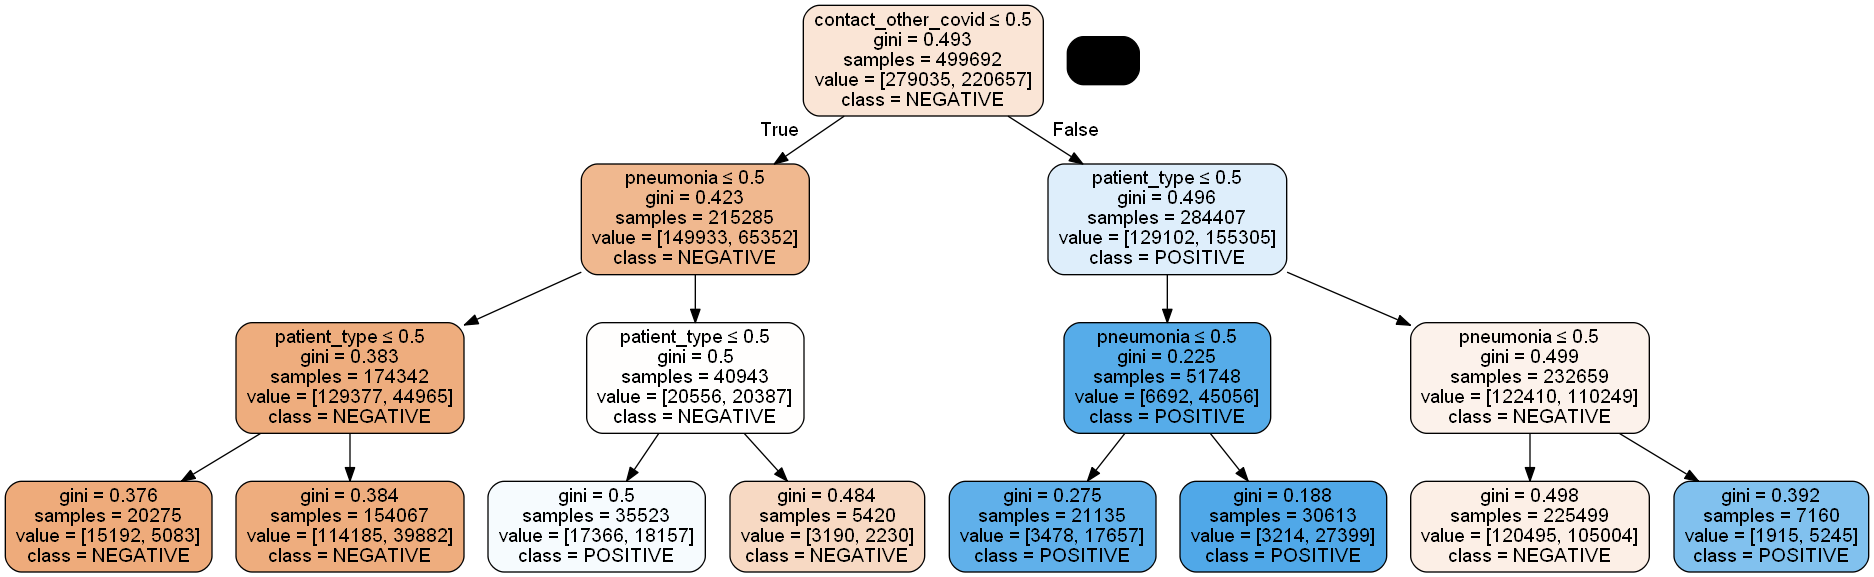

In [73]:
dot_data = StringIO()

tree.export_graphviz(model_tree,
                     out_file = dot_data, 
                     class_names = ['NEGATIVE', 'POSITIVE'],
                     feature_names = X_tree.columns.to_list(),
                     filled = True,
                     rounded = True,
                     special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

#### Utilizando apenas algumas features, a variável mais importante é "contact_other_covid", pois foi a primeira escolha de quebra da árvore.
(Está de acordo com as correlações vistas na EDA.)

## Decision Tree 2
#### Utilizando todas as variáveis

In [74]:
model_tree_2 = DecisionTreeClassifier(random_state=7)

model_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [75]:
y_tree_2_train_pred = model_tree_2.predict(X_train)
y_tree_2_valid_pred = model_tree_2.predict(X_valid)

print(y_tree_2_train_pred.shape, y_tree_2_valid_pred.shape)

(314806,) (134917,)


In [76]:
acc_tree_2_train = accuracy_score(y_train, y_tree_2_train_pred)
prec_tree_2_train = precision_score(y_train, y_tree_2_train_pred)
rec_tree_2_train = recall_score(y_train, y_tree_2_train_pred)

acc_tree_2_valid = accuracy_score(y_valid, y_tree_2_valid_pred)
prec_tree_2_valid = precision_score(y_valid, y_tree_2_valid_pred)
rec_tree_2_valid = recall_score(y_valid, y_tree_2_valid_pred)

print(f'Treino:\nAcc: {acc_tree_2_train:.2f}, Precision: {prec_tree_2_train:.2f}, Recall: {rec_tree_2_train:.2f}\n')
print(f'Validação:\nAcc: {acc_tree_2_valid:.2f}, Precision: {prec_tree_2_valid:.2f}, Recall: {rec_tree_2_valid:.2f}')

Treino:
Acc: 0.69, Precision: 0.76, Recall: 0.44

Validação:
Acc: 0.65, Precision: 0.67, Recall: 0.39


#### Está com overfit. Podemos ajustar os hiperparâmetros para diminuir esse overfit.

In [77]:
model_tree_2 = DecisionTreeClassifier(random_state=7, max_depth=4, min_samples_leaf=20)

model_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=7)

In [78]:
y_tree_2_train_pred = model_tree_2.predict(X_train)
y_tree_2_valid_pred = model_tree_2.predict(X_valid)

print(y_tree_2_train_pred.shape, y_tree_2_valid_pred.shape)

(314806,) (134917,)


In [79]:
acc_tree_2_train = accuracy_score(y_train, y_tree_2_train_pred)
prec_tree_2_train = precision_score(y_train, y_tree_2_train_pred)
rec_tree_2_train = recall_score(y_train, y_tree_2_train_pred)

acc_tree_2_valid = accuracy_score(y_valid, y_tree_2_valid_pred)
prec_tree_2_valid = precision_score(y_valid, y_tree_2_valid_pred)
rec_tree_2_valid = recall_score(y_valid, y_tree_2_valid_pred)

print(f'Treino:\nAcc: {acc_tree_2_train:.2f}, Precision: {prec_tree_2_train:.2f}, Recall: {rec_tree_2_train:.2f}\n')
print(f'Validação:\nAcc: {acc_tree_2_valid:.2f}, Precision: {prec_tree_2_valid:.2f}, Recall: {rec_tree_2_valid:.2f}')

Treino:
Acc: 0.65, Precision: 0.72, Recall: 0.35

Validação:
Acc: 0.65, Precision: 0.72, Recall: 0.36


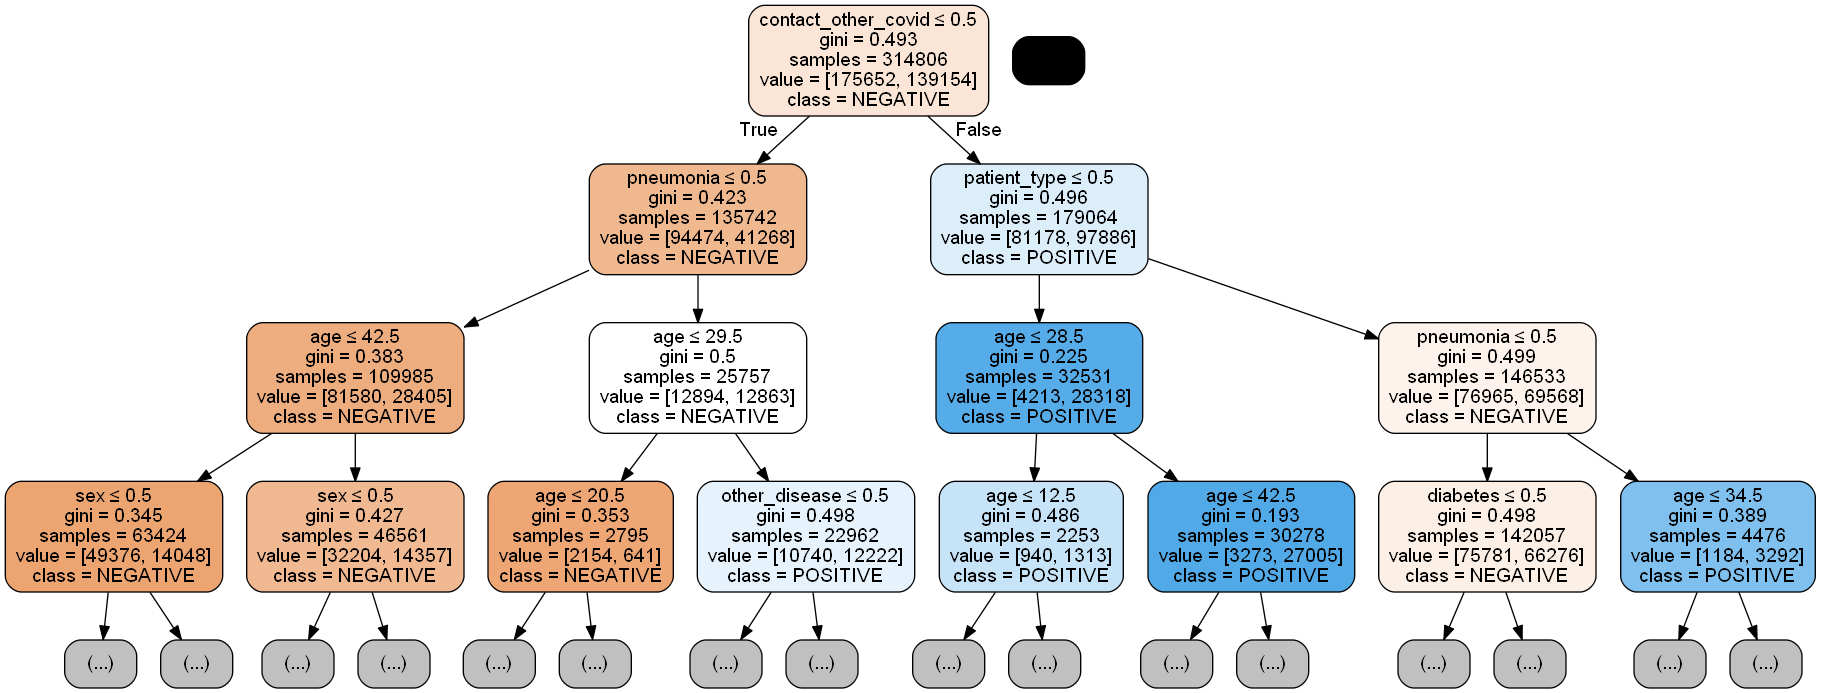

In [80]:
dot_data_2 = StringIO()

tree.export_graphviz(model_tree_2, 
                     max_depth=3, 
                     out_file = dot_data_2, 
                     class_names = ['NEGATIVE', 'POSITIVE'],
                     feature_names = X_train.columns.to_list(),
                     filled = True,
                     rounded = True,
#                      leaves_parallel = True,
                     special_characters = True)

graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue()) 
Image(graph_2.create_png())

#### Utilizando todas as features, a variável mais importante continua sendo "contact_other_covid", pois foi a primeira escolha de quebra da árvore.

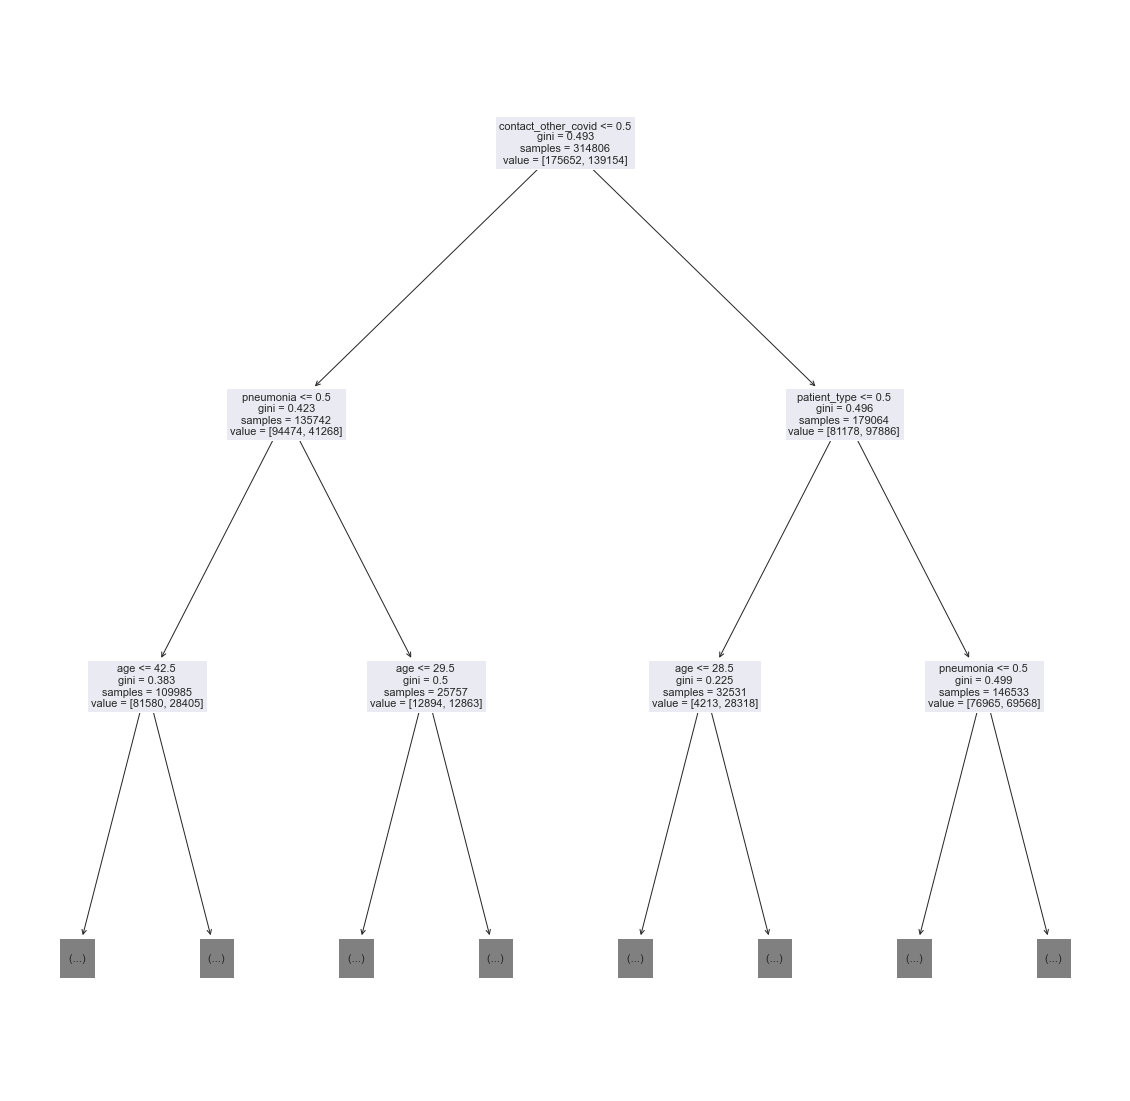

In [81]:
# Outra maneira de plotar a árvore de decisão com os mesmos dados (alterando apenas "max_depth=2" para ficar legível)
plt.figure(figsize=(20, 20))
plot_tree(model_tree_2, max_depth=2, feature_names=X_train.columns)
plt.show()

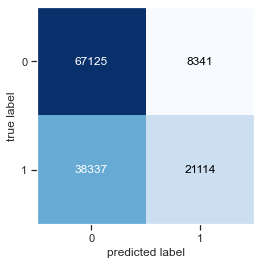

In [82]:
cm_tree_2 = confusion_matrix(y_valid, y_tree_2_valid_pred)

plot_confusion_matrix(conf_mat=cm_tree_2)
plt.show()

In [83]:
df_covid_test['predict_tree_2'] = model_tree_2.predict(X_test)
df_covid_test.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,predict_lr_2,predict_tree_2
id,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0


In [84]:
df_covid_test['predict_tree_2'].value_counts(normalize=True)

0    0.780844
1    0.219156
Name: predict_tree_2, dtype: float64

In [85]:
acc_tree_2_test = accuracy_score(df_covid_test['covid_res'], df_covid_test['predict_tree_2'])
prec_tree_2_test = precision_score(df_covid_test['covid_res'], df_covid_test['predict_tree_2'])
rec_tree_2_test = recall_score(df_covid_test['covid_res'], df_covid_test['predict_tree_2'])

print(f'Teste:\nAcc: {acc_tree_2_test:.2f}, Precision: {prec_tree_2_test:.2f}, Recall: {rec_tree_2_test:.2f}')

Teste:
Acc: 0.65, Precision: 0.72, Recall: 0.36


## Random Forest

In [89]:
model_rf = RandomForestClassifier(max_depth=3, random_state=7)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=7)

In [90]:
y_rf_train_pred = model_rf.predict(X_train)
y_rf_valid_pred = model_rf.predict(X_valid)

print(y_rf_train_pred.shape, y_rf_valid_pred.shape)

(314806,) (134917,)


In [91]:
acc_rf_train = accuracy_score(y_train, y_rf_train_pred)
prec_rf_train = precision_score(y_train, y_rf_train_pred)
rec_rf_train = recall_score(y_train, y_rf_train_pred)

acc_rf_valid = accuracy_score(y_valid, y_rf_valid_pred)
prec_rf_valid = precision_score(y_valid, y_rf_valid_pred)
rec_rf_valid = recall_score(y_valid, y_rf_valid_pred)

print(f'Treino:\nAcc: {acc_rf_train:.2f}, Precision: {prec_rf_train:.2f}, Recall: {rec_rf_train:.2f}\n')
print(f'Validação:\nAcc: {acc_rf_valid:.2f}, Precision: {prec_rf_valid:.2f}, Recall: {rec_rf_valid:.2f}')

Treino:
Acc: 0.65, Precision: 0.73, Recall: 0.34

Validação:
Acc: 0.66, Precision: 0.73, Recall: 0.34


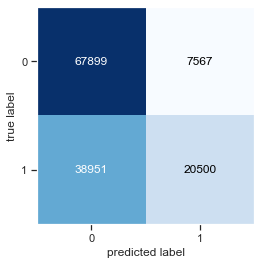

In [92]:
cm_rf = confusion_matrix(y_valid, y_rf_valid_pred)

plot_confusion_matrix(conf_mat=cm_rf)
plt.show()

In [93]:
df_covid_test['predict_rf'] = model_rf.predict(X_test)
df_covid_test.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,predict_lr_2,predict_tree_2,predict_rf
id,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0


In [94]:
df_covid_test['predict_rf'].value_counts(normalize=True)

0    0.791311
1    0.208689
Name: predict_rf, dtype: float64

In [95]:
acc_rf_test = accuracy_score(df_covid_test['covid_res'], df_covid_test['predict_rf'])
prec_rf_test = precision_score(df_covid_test['covid_res'], df_covid_test['predict_rf'])
rec_rf_test = recall_score(df_covid_test['covid_res'], df_covid_test['predict_rf'])

print(f'Teste:\nAcc: {acc_rf_test:.2f}, Precision: {prec_rf_test:.2f}, Recall: {rec_rf_test:.2f}')

Teste:
Acc: 0.66, Precision: 0.73, Recall: 0.35


#### Com esse modelo, já podemos utilizar o "feature_importances" e "estimators" para verificar a importância de cada feature.

In [96]:
std_rf = np.std([model_rf.feature_importances_ for model_rf in model_rf.estimators_], axis=0)
std_rf

array([0.03134632, 0.23459284, 0.20409269, 0.12821445, 0.        ,
       0.07060311, 0.00276098, 0.00119767, 0.00705873, 0.04512221,
       0.00981531, 0.00028002, 0.03256615, 0.00431512, 0.00351435,
       0.22838843])

In [97]:
importances_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_rf.feature_importances_,
    'std': std_rf}).sort_values('importance', ascending=False)

importances_rf

,feature,importance,std
15,contact_other_covid,0.388972,0.228388
1,patient_type,0.231975,0.234593
2,pneumonia,0.191614,0.204093
3,age,0.090610,0.128214
5,diabetes,0.033409,0.070603
9,hypertension,0.022041,0.045122
0,sex,0.015369,0.031346
12,obesity,0.014709,0.032566
10,other_disease,0.005404,0.009815
8,inmsupr,0.002389,0.007059


#### Essa análise sobre a importância das features está de acordo com as correlações vistas na EDA e com as árvores de decisão obtidas acima.

## AdaBoost

In [98]:
model_ab = AdaBoostClassifier(random_state=7)

model_ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=7)

In [99]:
y_ab_train_pred = model_ab.predict(X_train)
y_ab_valid_pred = model_ab.predict(X_valid)

print(y_ab_train_pred.shape, y_ab_valid_pred.shape)

(314806,) (134917,)


In [100]:
acc_ab_train = accuracy_score(y_train, y_ab_train_pred)
prec_ab_train = precision_score(y_train, y_ab_train_pred)
rec_ab_train = recall_score(y_train, y_ab_train_pred)

acc_ab_valid = accuracy_score(y_valid, y_ab_valid_pred)
prec_ab_valid = precision_score(y_valid, y_ab_valid_pred)
rec_ab_valid = recall_score(y_valid, y_ab_valid_pred)

print(f'Treino:\nAcc: {acc_ab_train:.2f}, Precision: {prec_ab_train:.2f}, Recall: {rec_ab_train:.2f}\n')
print(f'Validação:\nAcc: {acc_ab_valid:.2f}, Precision: {prec_ab_valid:.2f}, Recall: {rec_ab_valid:.2f}')

Treino:
Acc: 0.65, Precision: 0.62, Recall: 0.53

Validação:
Acc: 0.65, Precision: 0.62, Recall: 0.54


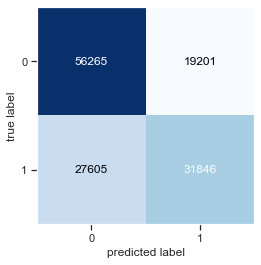

In [101]:
cm_ab = confusion_matrix(y_valid, y_ab_valid_pred)

plot_confusion_matrix(conf_mat=cm_ab)
plt.show()

In [102]:
df_covid_test['predict_ab'] = model_ab.predict(X_test)
df_covid_test.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,predict_lr_2,predict_tree_2,predict_rf,predict_ab
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,1,1,0,1
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,1,0,0,1


In [103]:
df_covid_test['predict_ab'].value_counts(normalize=True)

0    0.620004
1    0.379996
Name: predict_ab, dtype: float64

In [104]:
acc_ab_test = accuracy_score(df_covid_test['covid_res'], df_covid_test['predict_ab'])
prec_ab_test = precision_score(df_covid_test['covid_res'], df_covid_test['predict_ab'])
rec_ab_test = recall_score(df_covid_test['covid_res'], df_covid_test['predict_ab'])

print(f'Teste:\nAcc: {acc_ab_test:.2f}, Precision: {prec_ab_test:.2f}, Recall: {rec_ab_test:.2f}')

Teste:
Acc: 0.65, Precision: 0.62, Recall: 0.54


## LightGBM

In [105]:
model_lgbm = LGBMClassifier(random_state=7)

model_lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=7)

In [106]:
y_lgbm_train_pred = model_lgbm.predict(X_train)
y_lgbm_valid_pred = model_lgbm.predict(X_valid)

print(y_lgbm_train_pred.shape, y_lgbm_valid_pred.shape)

(314806,) (134917,)


In [107]:
acc_lgbm_train = accuracy_score(y_train, y_lgbm_train_pred)
prec_lgbm_train = precision_score(y_train, y_lgbm_train_pred)
rec_lgbm_train = recall_score(y_train, y_lgbm_train_pred)

acc_lgbm_valid = accuracy_score(y_valid, y_lgbm_valid_pred)
prec_lgbm_valid = precision_score(y_valid, y_lgbm_valid_pred)
rec_lgbm_valid = recall_score(y_valid, y_lgbm_valid_pred)

print(f'Treino:\nAcc: {acc_lgbm_train:.2f}, Precision: {prec_lgbm_train:.2f}, Recall: {rec_lgbm_train:.2f}\n')
print(f'Validação:\nAcc: {acc_lgbm_valid:.2f}, Precision: {prec_lgbm_valid:.2f}, Recall: {rec_lgbm_valid:.2f}')

Treino:
Acc: 0.67, Precision: 0.71, Recall: 0.41

Validação:
Acc: 0.67, Precision: 0.71, Recall: 0.41


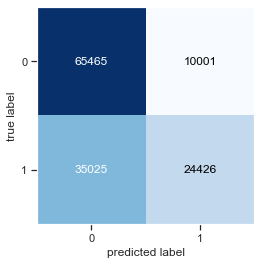

In [108]:
cm_lgbm = confusion_matrix(y_valid, y_lgbm_valid_pred)

plot_confusion_matrix(conf_mat=cm_lgbm)
plt.show()

In [109]:
df_covid_test['predict_lgbm'] = model_lgbm.predict(X_test)
df_covid_test.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,predict_lr_2,predict_tree_2,predict_rf,predict_ab,predict_lgbm
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,1,0,0,1,0
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,1,1,0,1,1
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1,1,1,1,1,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,1,0,0,1,0


In [110]:
df_covid_test['predict_lgbm'].value_counts(normalize=True)

0    0.744622
1    0.255378
Name: predict_lgbm, dtype: float64

In [111]:
acc_lgbm_test = accuracy_score(df_covid_test['covid_res'], df_covid_test['predict_lgbm'])
prec_lgbm_test = precision_score(df_covid_test['covid_res'], df_covid_test['predict_lgbm'])
rec_lgbm_test = recall_score(df_covid_test['covid_res'], df_covid_test['predict_lgbm'])

print(f'Teste:\nAcc: {acc_lgbm_test:.2f}, Precision: {prec_lgbm_test:.2f}, Recall: {rec_lgbm_test:.2f}')

Teste:
Acc: 0.67, Precision: 0.71, Recall: 0.41


## Escolha do modelo

#### Priorizando o "recall", podemos escolher o AdaBoost, pois, com esse modelo, obtivemos a menor quantidade de falsos negativos, que seria um fator importante para testes de COVID. Além disso, a acurácia se manteve parecida em relação aos outros modelos.

# Otimização do Modelo

## Cross Validation

In [112]:
cv = cross_validate(model_ab, X_train, y_train, scoring=['recall', 'f1'], return_train_score=True, cv=2)

print(cv)

{'fit_time': array([4.23660517, 4.24431324]), 'score_time': array([1.60628104, 1.46685028]), 'test_recall': array([0.53086508, 0.52788996]), 'train_recall': array([0.53006022, 0.52891042]), 'test_f1': array([0.57344688, 0.57143524]), 'train_f1': array([0.57283536, 0.57262005])}


In [113]:
mean_recall_train = cv['train_recall'].mean()
mean_recall_valid = cv['test_recall'].mean()

std_recall_train = cv['train_recall'].std()
std_recall_valid = cv['test_recall'].std()

print(f'Recall de treino: {mean_recall_train:.2f} {std_recall_train:.4f}')
print(f'Recall de validação: {mean_recall_valid:.2f} {std_recall_valid:.4f}')

Recall de treino: 0.53 0.0006
Recall de validação: 0.53 0.0015


In [114]:
cv

{'fit_time': array([4.23660517, 4.24431324]),
 'score_time': array([1.60628104, 1.46685028]),
 'test_recall': array([0.53086508, 0.52788996]),
 'train_recall': array([0.53006022, 0.52891042]),
 'test_f1': array([0.57344688, 0.57143524]),
 'train_f1': array([0.57283536, 0.57262005])}

## Stratified K-Fold

In [115]:
kf = StratifiedKFold(n_splits=5)
kf.get_n_splits(X_train)

5

In [116]:
next(kf.split(X_train, y_train))

(array([ 62624,  62629,  62631, ..., 314803, 314804, 314805]),
 array([    0,     1,     2, ..., 63392, 63396, 63399]))

In [117]:
list_accuracy = []
list_precision = []
list_recall = []
list_f1_score = []

i = 1
for train_index, val_index in kf.split(X_train, y_train):
    print("============================================================================================")
    print("Fold ", i)
    print("TRAIN:", train_index, "VALIDATION:", val_index)
    KFold_X_train, KFold_X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    KFold_y_train, KFold_y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    model_ab.fit(KFold_X_train, KFold_y_train)
    y_pred = model_ab.predict(KFold_X_val)
    #Calcula as métricas
    acc = accuracy_score(KFold_y_val, y_pred)
    prec = precision_score(KFold_y_val, y_pred)
    recall = recall_score(KFold_y_val, y_pred)
    f1 = f1_score(KFold_y_val, y_pred)
    print("Accuracy: ", acc)
    print("Precison: ", prec)
    print("Recall:    ", recall)
    print("F1-Score: ", f1)
    
    if recall < 0.48:
        KFold_X_train['target'] = KFold_y_train
        KFold_X_train.to_csv(f'fold_{i}_problema.csv')
        
    # salva na lista
    list_accuracy.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    list_f1_score.append(f1)
    i += 1
print("============================================================================================")

Fold  1
TRAIN: [ 62624  62629  62631 ... 314803 314804 314805] VALIDATION: [    0     1     2 ... 63392 63396 63399]
Accuracy:  0.6506305390553032
Precison:  0.6191001143230442
Recall:     0.5448241169918436
F1-Score:  0.5795921487682281
Fold  2
TRAIN: [     0      1      2 ... 314803 314804 314805] VALIDATION: [ 62624  62629  62631 ... 126054 126056 126060]
Accuracy:  0.6492272994393354
Precison:  0.622541700439401
Recall:     0.5243621990657564
F1-Score:  0.5692496733045972
Fold  3
TRAIN: [     0      1      2 ... 314803 314804 314805] VALIDATION: [125847 125848 125849 ... 189042 189044 189045]
Accuracy:  0.652642111783485
Precison:  0.6260520194544301
Recall:     0.5318889008659409
F1-Score:  0.5751418136607351
Fold  4
TRAIN: [     0      1      2 ... 314803 314804 314805] VALIDATION: [188673 188675 188678 ... 251877 251878 251882]
Accuracy:  0.6493861279204587
Precison:  0.6210362519976449
Recall:     0.5305953792533505
F1-Score:  0.5722645275048924
Fold  5
TRAIN: [     0      1   

## GridSearch

In [118]:
parameters = {
    'n_estimators': [20, 50, 70, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

clf = GridSearchCV(model_ab, parameters, verbose=3, scoring='recall')

clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.01, n_estimators=20;, score=0.707 total time=   3.0s
[CV 2/5] END learning_rate=0.01, n_estimators=20;, score=0.705 total time=   3.1s
[CV 3/5] END learning_rate=0.01, n_estimators=20;, score=0.706 total time=   3.1s
[CV 4/5] END learning_rate=0.01, n_estimators=20;, score=0.701 total time=   3.1s
[CV 5/5] END learning_rate=0.01, n_estimators=20;, score=0.699 total time=   2.9s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.228 total time=   6.2s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.226 total time=   6.0s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.229 total time=   6.4s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.226 total time=   6.5s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.226 total time=   6.2s
[CV 1/5] END learning_rate=0.01, n_estimators=70;, score=0.228 total time=   9.4s
[CV 2/5] END learning_rate=0.01, n_es

GridSearchCV(estimator=AdaBoostClassifier(random_state=7),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [20, 50, 70, 150]},
             scoring='recall', verbose=3)

In [119]:
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 20}

In [120]:
model_ab = AdaBoostClassifier(random_state=7, learning_rate=0.01, n_estimators=20)

model_ab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=20, random_state=7)

In [121]:
y_ab_train_pred = model_ab.predict(X_train)
y_ab_valid_pred = model_ab.predict(X_valid)

print(y_ab_train_pred.shape, y_ab_valid_pred.shape)

(314806,) (134917,)


In [122]:
acc_ab_train = accuracy_score(y_train, y_ab_train_pred)
prec_ab_train = precision_score(y_train, y_ab_train_pred)
rec_ab_train = recall_score(y_train, y_ab_train_pred)

acc_ab_valid = accuracy_score(y_valid, y_ab_valid_pred)
prec_ab_valid = precision_score(y_valid, y_ab_valid_pred)
rec_ab_valid = recall_score(y_valid, y_ab_valid_pred)

print(f'Treino:\nAcc: {acc_ab_train:.2f}, Precision: {prec_ab_train:.2f}, Recall: {rec_ab_train:.2f}\n')
print(f'Validação:\nAcc: {acc_ab_valid:.2f}, Precision: {prec_ab_valid:.2f}, Recall: {rec_ab_valid:.2f}')

Treino:
Acc: 0.61, Precision: 0.55, Recall: 0.70

Validação:
Acc: 0.61, Precision: 0.55, Recall: 0.70


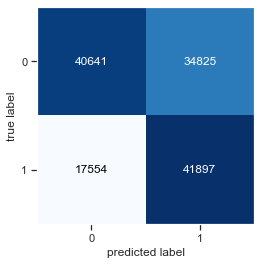

In [123]:
cm_ab = confusion_matrix(y_valid, y_ab_valid_pred)

plot_confusion_matrix(conf_mat=cm_ab)
plt.show()

#### A acurácia se manteve acima de 60% (caiu de 65% para 61%), subimos de 54% para 70% de "recall" e os falsos negativos caíram de 27605 para 17554.

In [124]:
df_covid_test['predict_ab_2'] = model_ab.predict(X_test)
df_covid_test.head()

,sex,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,...,renal_chronic,tobacco,contact_other_covid,covid_res,predict_lr_2,predict_tree_2,predict_rf,predict_ab,predict_lgbm,predict_ab_2
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
14,0,1,0.0,38,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,1,0,1
16,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,1,0,1,1,1
19,0,1,0.0,63,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1,1,1,1,1,1,1
20,0,1,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,0,1,0,1


In [125]:
# Predição
df_covid_test['predict_ab_2'].value_counts(normalize=True)

1    0.572775
0    0.427225
Name: predict_ab_2, dtype: float64

In [126]:
# Porcentagem real (valores do target)
df_covid_test['covid_res'].value_counts(normalize=True)

0    0.558686
1    0.441314
Name: covid_res, dtype: float64

# Conclusões

Na primeira etapa do projeto, observou-se um fato importante (ao transformar a variável "id" em index): a grande quantidade de dados duplicados.   
Diante disso, poderíamos desatentamente removê-los, como se faz em muitos casos, ou analisar melhor os dados.   
Como o "id" não se repete, já poderíamos concluir que, na verdade, não havia dados duplicados. No entanto, decidi analisar minuciosamente cada feature, a fim de compreender melhor esses dados.   

Em relação aos dados faltantes, na maioria das variáveis havia menos do que 1% de dados nulos e optei por preencher com a moda (0).   
Apenas duas variáveis foram removidas ("intubed" e "icu"), por possuir apenas 21,5% de dados válidos.   
No caso de "pregnancy", observou-se que a grande maioria dos dados faltantes estava relacionada ao sexo masculino. Portanto, esses dados foram preenchidos com "0". Com isso, restou apenas 0,5% de dados nulos em relação ao sexo feminino e optei por preencher com a moda (0), já que a porcentagem sobre o valor "0" era de 98,5%.   
Como a variável "contact_other_covid" possuía quase 70% de dados válidos, resolvi mantê-la e preencher os dados faltantes de modo a preservar a porcentagem dos valores (0 e 1). Ou seja, 56,9% dos dados nulos foram preenchidos com "1" e o restante com "0".

Com os dados preparados e normalizados, realizou-se a modelagem utilizando:   
- Regressão Logística;   
- Decision Tree;   
- Random Forest;   
- AdaBoost;   
- LightGBM.

O LightGBM foi o modelo que apresentou a melhor acurácia (67%), 71% de precisão e 41% de recall.   
No entanto, como o AdaBoost obteve uma acurácia mais ou menos parecida (65%), porém com o recall mais alto (54%) em relação aos outros modelos, optei por escolhê-lo como o melhor modelo, já que diminuir os falsos negativos nos testes de COVID poderia ser relevante.   
Com a otimização dos dados, foi possível alcançar um recall de 70%, mantendo a acurácia acima de 60% (61%) e diminuindo os falsos negativos de 27605 para 17554 registros.